### Business Problem Overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

### Definitions of Churn

Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

### Name of model developers
1. Ajit Nalawade
2. Gaurav Desurakar

### Below are the steps taken to build model :
- Understand the data.
- Prepare the data as per the guidelines.
- EDA(Missing value treatment, Outliers treatment, Univariate analysis, Bi-variate analysis)
- Model Building
    1. Prediction Model
       - PCA + SMOTE + Random Forest
       - PCA + SMOTE + Logic Regression
    2. Churn predictos
        - RFE + XGboost
        - RFE + Random Forest
- Accurcy metric:We have used ROC AUC Curve to measure model. Please see below reason why we prefered ROC AUC curve.
    - An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
        - True Positive Rate
        - False Positive Rate
    - AUC
        - AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
        - AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
sns.set(style="ticks", color_codes=True)

import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings;
warnings.filterwarnings('ignore');

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

In [3]:
#URL For colab
url = 'https://raw.githubusercontent.com/ajit-nalawade/datarepository/master/telecom_churn_data.csv'
#url = 'telecom_churn_data.csv'
churn = pd.read_csv(url)

## Understand the data

In [4]:
#Glimpse of the data
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
#Dimension of the data 
churn.shape

(99999, 226)

There are total 171 columns and 1 Lakh observations

In [6]:
# Unique column 
churn.mobile_number.nunique()

99999

Since, the unique count of mobile number column is same as total observations in the datset, the mobile number column is the Id column for this dataset

In [7]:
#Statistics of the dataset
churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Preparation
Steps to follow :- 
- Filter High Value Customers as per business logic
- Tag customers as churned or not churned as oer business logic


### Filter high-value customers: 
Filter high value customers , high value customer are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase). 

In [8]:
#calculate average recharge amount in good phase
churn['avg_rech_good_phase'] = (churn.total_rech_amt_6 + churn.total_rech_amt_7)/2

In [9]:
#calculate 70% percentile of average recharge amount in good phase
recharge = churn.avg_rech_good_phase.quantile(.7)
recharge

368.5

In [10]:
#filter the high value customer who have recharged for amount greater or equal to 368.5 in good phase.
churn = churn[churn.avg_rech_good_phase >= recharge] 

In [11]:
#Total high value customers
len(churn)

30011

### Tagging churn
Customers are tagged churned based on whether they have made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.


In [12]:
# if incoming , outgoing ,volume of 2g data & volume of 3g data is zero then the customer is churned.
# Set 1 as churned and 0 as not churned
churn['churned'] = np.where((churn.total_ic_mou_9 == 0) & 
                             (churn.total_og_mou_9 == 0) & 
                             (churn.vol_2g_mb_9 == 0) & 
                             (churn.vol_3g_mb_9 == 0)                            
                            , 1, 0)

### Removing Churned month data

In [13]:
#removing churned month columns i.e columns name ending with '_9'
churn_col = [col for col in churn.columns if col.endswith('_9')]
churn.drop(churn_col , axis = 1, inplace = True)

## EDA
Steps to follow :- 
- Understand the event rate 
- Remove columns which are not usefull in analyis
- segregate columns into numeric and categorical
- Univariate Analysis
    1. Analyze numeric & categorical columns data
    2. Missing value treatment
    3. Outlier treatment
- Bivariate Analysis
- Multivarate Analysis
- Conclusion

### Understanding the event rate

In [14]:
print("Total churned customers :: " , len(churn[churn['churned']==1]))
print("% of churned customers :: " , round(len(churn[churn['churned']==1])/len(churn)*100))
print("Total non-churned customers :: " ,len(churn[churn['churned']==0]))
print("% of non-churned customers :: " , round(len(churn[churn['churned']==0])/len(churn)*100))

Total churned customers ::  2593
% of churned customers ::  9
Total non-churned customers ::  27418
% of non-churned customers ::  91


<b>Inference:</b>
Event ratio is 91:9, which means data is imbalance. We need to handle data using Data Imbalancing technique(SMOTE)

### Removing columns which are not usefull in analysis

In [15]:
#droping columns with only 1 unique value
cols_to_drop = [cols for cols in churn.columns if churn[cols].nunique() == 1]

for col in cols_to_drop:
    print(col , " :: ", churn[col].unique())
    
# droping columns because the columns contain only one unique value and rest nan
churn.drop(cols_to_drop,inplace = True , axis = 1)  


circle_id  ::  [109]
loc_og_t2o_mou  ::  [ 0. nan]
std_og_t2o_mou  ::  [ 0. nan]
loc_ic_t2o_mou  ::  [ 0. nan]
last_date_of_month_6  ::  ['6/30/2014']
last_date_of_month_7  ::  ['7/31/2014' nan]
last_date_of_month_8  ::  ['8/31/2014' nan]
std_og_t2c_mou_6  ::  [ 0. nan]
std_og_t2c_mou_7  ::  [ 0. nan]
std_og_t2c_mou_8  ::  [ 0. nan]
std_ic_t2o_mou_6  ::  [ 0. nan]
std_ic_t2o_mou_7  ::  [ 0. nan]
std_ic_t2o_mou_8  ::  [ 0. nan]


In [16]:
#checking the dataset dimensions after droping columns
print(churn.shape)

(30011, 161)


### Segregating Columns into numeric and categorical columns

In [17]:
# Segregating ID, Numeric & Categorical columns
ID_COLS = ['mobile_number']

#NUMERIC COLUMNS - columns whose datatype is int , float and unique records are greater than 20
NUMERIC_COLS = [cols  for cols in churn.columns if (churn[cols].nunique() > 20) & (cols not in ID_COLS) & (churn[cols].dtype in['float64','int64'])]
print("TOTAL NUMERIC COLUMNS :: ",len(NUMERIC_COLS))
print("NUMERIC VARAIBLES ",NUMERIC_COLS)

#CATEGORY COLUMNS - columns which are not numeric and id 
CATEGORY_COLS = [cols for cols in churn.columns if (cols not in ID_COLS + NUMERIC_COLS )]
print("\nTOTAL CATGEORY COLUMNS :: ",len(CATEGORY_COLS))
print("CATGEORY VARAIBLES ",CATEGORY_COLS)

TOTAL NUMERIC COLUMNS ::  141
NUMERIC VARAIBLES  ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mo

In [18]:
# Confirm the total no of columns after segrigating is  equal to columns in original  dataset.
print("total columns", len(ID_COLS) + len(CATEGORY_COLS) + len(NUMERIC_COLS))

total columns 161


## Univariate Analysis

###  Numeric Data 
#### Missing Value Treatment

In [19]:
#checking for null values in numeric fields
round(churn[NUMERIC_COLS].isnull().sum()*100/len(churn),2)

arpu_6                  0.00
arpu_7                  0.00
arpu_8                  0.00
onnet_mou_6             1.05
onnet_mou_7             1.01
onnet_mou_8             3.13
offnet_mou_6            1.05
offnet_mou_7            1.01
offnet_mou_8            3.13
roam_ic_mou_6           1.05
roam_ic_mou_7           1.01
roam_ic_mou_8           3.13
roam_og_mou_6           1.05
roam_og_mou_7           1.01
roam_og_mou_8           3.13
loc_og_t2t_mou_6        1.05
loc_og_t2t_mou_7        1.01
loc_og_t2t_mou_8        3.13
loc_og_t2m_mou_6        1.05
loc_og_t2m_mou_7        1.01
loc_og_t2m_mou_8        3.13
loc_og_t2f_mou_6        1.05
loc_og_t2f_mou_7        1.01
loc_og_t2f_mou_8        3.13
loc_og_t2c_mou_6        1.05
loc_og_t2c_mou_7        1.01
loc_og_t2c_mou_8        3.13
loc_og_mou_6            1.05
loc_og_mou_7            1.01
loc_og_mou_8            3.13
std_og_t2t_mou_6        1.05
std_og_t2t_mou_7        1.01
std_og_t2t_mou_8        3.13
std_og_t2m_mou_6        1.05
std_og_t2m_mou

<b>Inference:</b>
1. There are few variables which has less than 10% of missing values. Those vars we are imputing with median
2. There are other variables which has more than 60% of missinng values. We are handling them separately, based on analysis
3. For the column arpu_3g_6 , total_rech_data_6 , max_rech_data_6 , count_rech_2g_6 , count_rech_3g_6 , av_rech_amt_data_6 the null values are same ie. 62.02 , it implies that there is some relation between missing values of this coumuns . It's the same pattern even for columns belonging to 7th & 8th month respectively. 
     

#### Below we are imputing missing value with median who has missing value percentage less than 10% 

In [20]:
#Impute missing value with median for < 10%
#For > 10% , get the list for further analysis
high_missing_values = []
len_churn = len(churn)
for col in NUMERIC_COLS :
    total_null = round(churn[col].isnull().sum()*100/len_churn,2)
    if((total_null > 0) & (total_null < 10) ):
        churn.loc[churn[col].isnull(),col] = churn[col].median()
    elif (total_null > 10):
        high_missing_values.append(col)
            

In [21]:
# Check the count of null when volume of 2g & 3g data is zero , which indicates that customer 
# has not opted for data services
round(churn[((churn['vol_2g_mb_6'] == 0) & (churn.vol_3g_mb_6 == 0)) | 
            ((churn['vol_2g_mb_7'] == 0) & (churn.vol_3g_mb_7 == 0)) | 
            ((churn['vol_2g_mb_8'] == 0) & (churn.vol_3g_mb_8 == 0)) ][high_missing_values].isnull().sum()*100/len(churn),3)

total_rech_data_6     62.024
total_rech_data_7     61.141
total_rech_data_8     60.834
max_rech_data_6       62.024
max_rech_data_7       61.141
max_rech_data_8       60.834
count_rech_2g_6       62.024
count_rech_2g_7       61.141
count_rech_2g_8       60.834
count_rech_3g_6       62.024
count_rech_3g_7       61.141
count_rech_3g_8       60.834
av_rech_amt_data_6    62.024
av_rech_amt_data_7    61.141
av_rech_amt_data_8    60.834
arpu_3g_6             62.024
arpu_3g_7             61.141
arpu_3g_8             60.834
arpu_2g_6             62.024
arpu_2g_7             61.141
arpu_2g_8             60.834
dtype: float64

when 2g & 3g volume is zero , the count of nulls ,  matched that of overall null values for those respective columns,it implies that the user didnt recharge for data for that month.Hence , we can impute this columns with zero.

In [22]:
churn[high_missing_values] = churn[high_missing_values].fillna(0,axis=1)

In [23]:
#rechecking for null values in numeric fields
round(churn[NUMERIC_COLS].isnull().sum()*100/len(churn),2)

arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
loc_og_mou_8           0.0
std_og_t2t_mou_6       0.0
std_og_t2t_mou_7       0.0
std_og_t2t_mou_8       0.0
std_og_t2m_mou_6       0.0
std_og_t2m_mou_7       0.0
std_og_t2m_mou_8       0.0
std_og_t2f_mou_6       0.0
s

#### Outliers treatment

#### Imputing outliers with median

In [24]:
index = 0 
count = 0 
for col in NUMERIC_COLS:
    quartile_1, quartile_3 = np.percentile(churn[col], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outlier_percent = round(len(churn.loc[(churn[col]>upper_bound) | (churn[col]< lower_bound)])/ len(churn) * 100,2)
    if ((outlier_percent > 0) & (outlier_percent <= 15)):
        churn.loc[(churn[col]>upper_bound) | (churn[col]< lower_bound), col] = churn[col].median() 
      

#### Distribution of Numeric Data

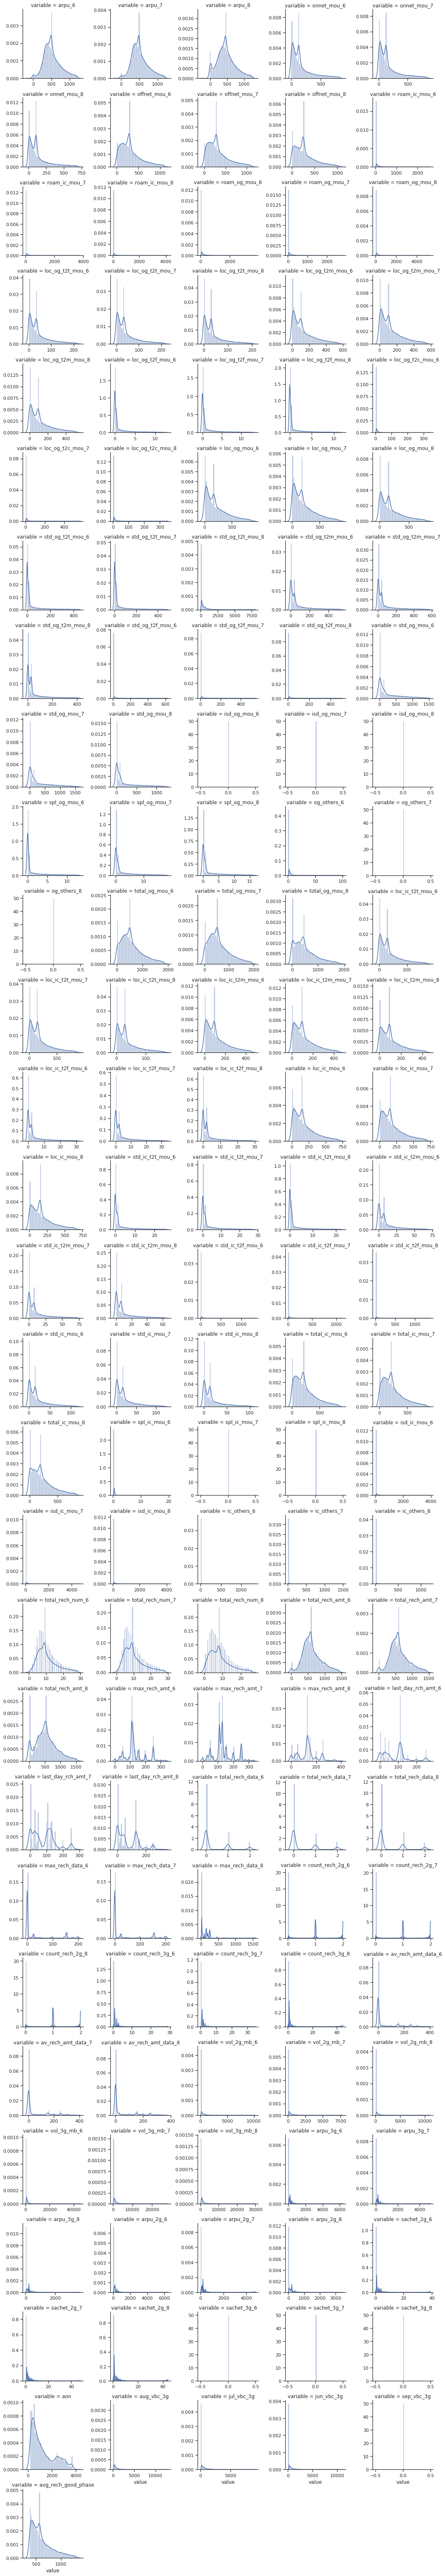

In [25]:
numeric_data = churn[NUMERIC_COLS]

f = pd.melt(numeric_data)
g = sns.FacetGrid(f, col='variable', col_wrap=5, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

### Inference:
1. Variables of Average revenue per user for month 6,7 & 8 are normally distributed.
2. Onnet Vars: Data is left skewed for month 6,7 & 8.
3. Offner Vars: Data is left skewed for month 6,7 & 8.
4. Local OG Mobile to Mobile vars data are left skewed for month 6,7 & 8.
5. Local OG Operator to other Mobile vars data are left skewed for month 6,7 & 8.
6. Local OG Operator to fixed line data are left skewed for 6,7 & 8 month. Also no of calls less as compare to other methods of call.
7. Local OG Minutes of Usage for the month of 6,7 & 8 are left skewed.
8. STD OG Minutes of Usage for the month of 6,7 & 8 are left skewed. Very less data available also outliers available
9. Total OG Minutes of Usage vars for the month of 6,7 & 8 are near to symetric distribution.
10. Total Recharge amount vars are normally distributed

**Most of numeric data is left skewed. Hence transformation of data needed**


## Categorical data:
#### Missing Value treatment

In [25]:
round(churn[CATEGORY_COLS].isnull().sum()*100/len(churn),2)

date_of_last_rech_6          0.21
date_of_last_rech_7          0.38
date_of_last_rech_8          1.98
date_of_last_rech_data_6    62.02
date_of_last_rech_data_7    61.14
date_of_last_rech_data_8    60.83
night_pck_user_6            62.02
night_pck_user_7            61.14
night_pck_user_8            60.83
monthly_2g_6                 0.00
monthly_2g_7                 0.00
monthly_2g_8                 0.00
monthly_3g_6                 0.00
monthly_3g_7                 0.00
monthly_3g_8                 0.00
fb_user_6                   62.02
fb_user_7                   61.14
fb_user_8                   60.83
churned                      0.00
dtype: float64

### Inference:
SInce , the date_of_last_rech_data , night_pck_user_6 , fb_user_6   column has high null values we opt to drop them and impute the date_of_last_rech column with mode.

In [0]:
#Imputing Date fields with mode
date_cols_to_impute =['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
churn[date_cols_to_impute] = churn[date_cols_to_impute].fillna(churn[date_cols_to_impute].mode().iloc[0])


In [0]:
# Droping columns since the percentage of missing values is high.
churn.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8',
           'night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
           ,axis = 1 ,inplace=True)
#updating Category_cols list
CATEGORY_COLS = [cols for cols in churn.columns if (cols not in ID_COLS + NUMERIC_COLS )]

In [28]:
#CHecking Nulls again
round(churn[CATEGORY_COLS].isnull().sum()*100/len(churn),2)

date_of_last_rech_6    0.0
date_of_last_rech_7    0.0
date_of_last_rech_8    0.0
monthly_2g_6           0.0
monthly_2g_7           0.0
monthly_2g_8           0.0
monthly_3g_6           0.0
monthly_3g_7           0.0
monthly_3g_8           0.0
churned                0.0
dtype: float64

### Analysis of Categorical data

In [29]:
churn[CATEGORY_COLS].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,churned
7,6/27/2014,7/25/2014,8/26/2014,0,0,0,0,0,0,1
8,6/25/2014,7/31/2014,8/30/2014,0,1,0,0,0,0,0
13,6/20/2014,7/22/2014,8/30/2014,0,0,0,0,0,0,0
16,6/30/2014,7/31/2014,8/14/2014,0,0,0,0,0,0,0
17,6/30/2014,7/30/2014,8/25/2014,0,0,0,0,0,0,0


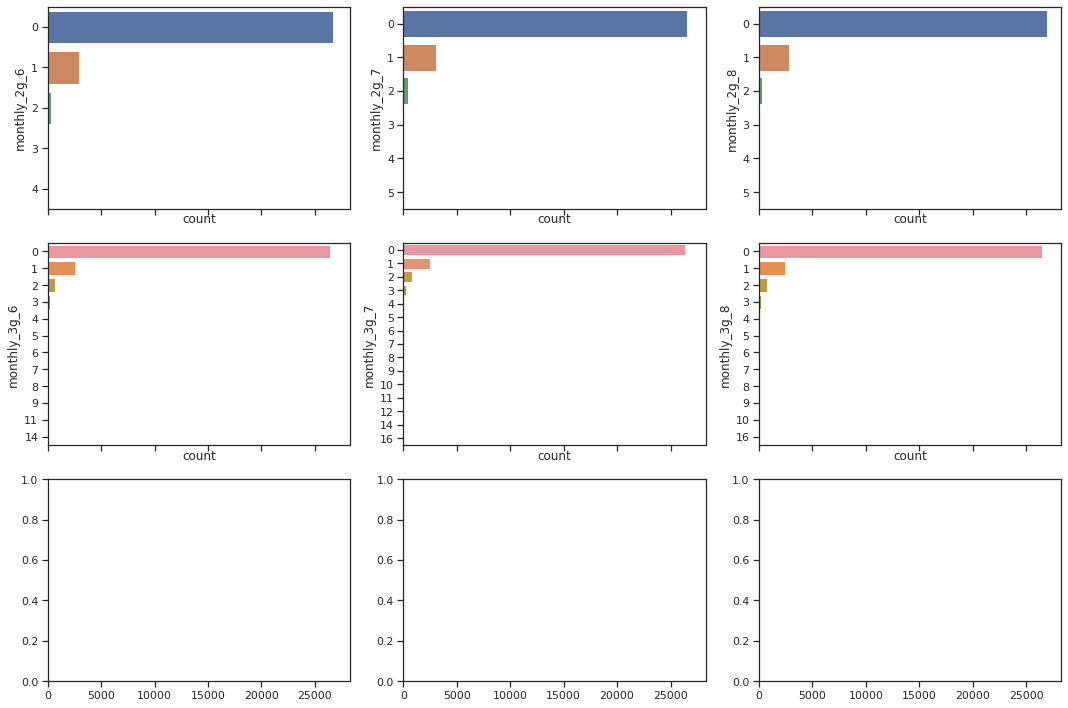

In [30]:
# Analysis Categorical Vars
categorical_data = churn[CATEGORY_COLS]

df = categorical_data[categorical_data.columns[~categorical_data.columns.isin(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','churned'])]]

fig, axes =plt.subplots(3,3, figsize=(15,10), sharex=True)

axes = axes.flatten()
object_bol = df.dtypes == 'object'
for ax, catplot in zip(axes, df):
    sns.countplot(y=catplot, data=df, ax=ax)

plt.tight_layout()  
plt.show()


### Inference on above graphs:
    1. Very few customers are opting for monthly data packs. 
  

In [31]:
#Analysis of date_of_last_rech field
print("Top 5 dates of recharge:",categorical_data.groupby("date_of_last_rech_6")['date_of_last_rech_6'].count().nlargest(5))
print("Top 5 dates of recharge:",categorical_data.groupby("date_of_last_rech_7")['date_of_last_rech_7'].count().nlargest(5))
print("Top 5 dates of recharge:",categorical_data.groupby("date_of_last_rech_8")['date_of_last_rech_8'].count().nlargest(5))


Top 5 dates of recharge: date_of_last_rech_6
6/30/2014    8786
6/29/2014    5589
6/28/2014    3716
6/27/2014    3244
6/26/2014    1839
Name: date_of_last_rech_6, dtype: int64
Top 5 dates of recharge: date_of_last_rech_7
7/31/2014    8041
7/30/2014    5355
7/29/2014    3478
7/28/2014    2861
7/25/2014    2116
Name: date_of_last_rech_7, dtype: int64
Top 5 dates of recharge: date_of_last_rech_8
8/31/2014    7264
8/30/2014    4790
8/29/2014    3376
8/28/2014    2948
8/25/2014    2209
Name: date_of_last_rech_8, dtype: int64


### Inference: 
Most of the recharges happened on last 5 days of the month

## Bivariate Analysis

Let's analyze the data and try to find the answers for the below questions 
 1. Which is the most revenue generating service, calls or the data service ?
 2. What the customer on the network do the most , incoming calls or outgoing calls ?
 3. What is the probability of the customer connecting to customer care center and then leaving the network ?
 4. Influence of Customer age on network to churning.


           Columns        Values
0  Calling Revenue  4.509253e+07
1     Data Revenue  9.361466e+06


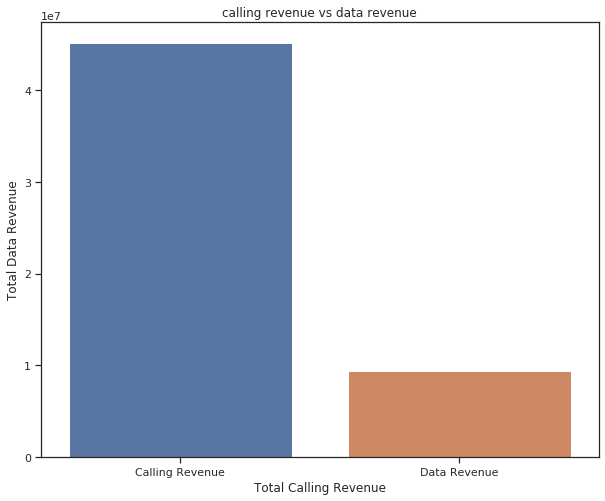

In [32]:
#1 . which is the most revenue generating service, calls or the data service ?

#Creating new features to find the most revenue generating service.
churn['avg_revenue_total'] = churn.arpu_6 +  churn.arpu_7 +  churn.arpu_8
churn['avg_2g_revenue_total'] = churn.arpu_2g_6 + churn.arpu_2g_7 + churn.arpu_2g_8
churn['avg_3g_revenue_total'] = churn.arpu_3g_6 + churn.arpu_3g_7 + churn.arpu_3g_8
churn['avg_data_revenue_total'] = churn.avg_2g_revenue_total + churn.avg_3g_revenue_total

plot1_labels = ['Calling Revenue' , 'Data Revenue']
plot1 = [churn['avg_revenue_total'].sum() , churn['avg_data_revenue_total'].sum()]

df = pd.DataFrame(dict(x=plot1_labels, y=plot1))
df.columns = ['Columns','Values']
print(df.head())

plt.figure(figsize=(10, 8))
axes = sns.barplot(x='Columns',y='Values', orient ="v"  , data=df)
plt.xlabel('Total Calling Revenue')
plt.ylabel('Total Data Revenue')
plt.title('calling revenue vs data revenue')
plt.show()


<b>Inference :</b> The revenue of calling service is much higher than that of data service. This could be due to high price of data service or due to low speed and poor network quality due to which customers don't prefer using data service. We need to do more indepth analysis to make more concreate conclusion. 

                          Columns       Values
0  Total Outgoing Call In Minutes  49810741.16
1  Total Incoming Call In Minutes  21019462.07


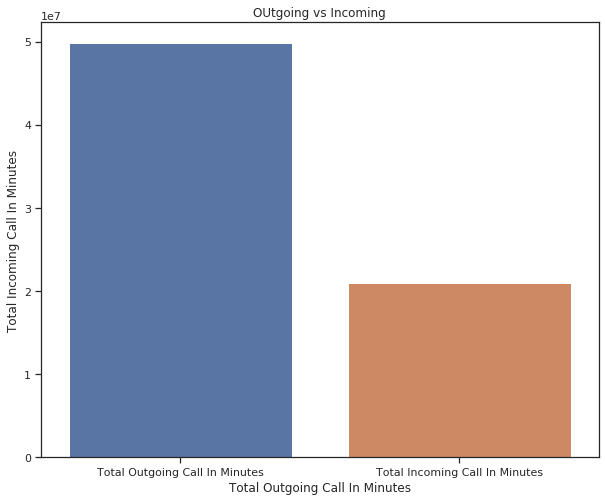

In [33]:
# 2. What the customer on the network do the most , incoming calls or outgoing calls ?

churn['total_og_mou'] = churn.total_og_mou_6 + churn.total_og_mou_7 + churn.total_og_mou_8
churn['total_ic_mou'] = churn.total_ic_mou_6 + churn.total_ic_mou_7 + churn.total_ic_mou_8

plot2_labels = ['Total Outgoing Call In Minutes' , 'Total Incoming Call In Minutes']
plot2 = [churn['total_og_mou'].sum() , churn['total_ic_mou'].sum()]

df_2 = pd.DataFrame(dict(x=plot2_labels, y=plot2))
df_2.columns = ['Columns','Values']
print(df_2.head())

plt.figure(figsize=(10, 8))
axes = sns.barplot(x='Columns',y='Values', orient ="v"  , data=df_2)
plt.xlabel('Total Outgoing Call In Minutes')
plt.ylabel('Total Incoming Call In Minutes')
plt.title('OUtgoing vs Incoming')
plt.show()


<b>Inference :</b> Customers make more outgoing calls than receiving incoming calls.

Count of churned and non churned customers when calls made to customer center...
   churned  call_to_customer_center
0        0                    13480
1        1                     1189
Count of churned and non churned customers when call not made to customer center...
   churned  call_to_customer_center
0        0                    13938
1        1                     1404


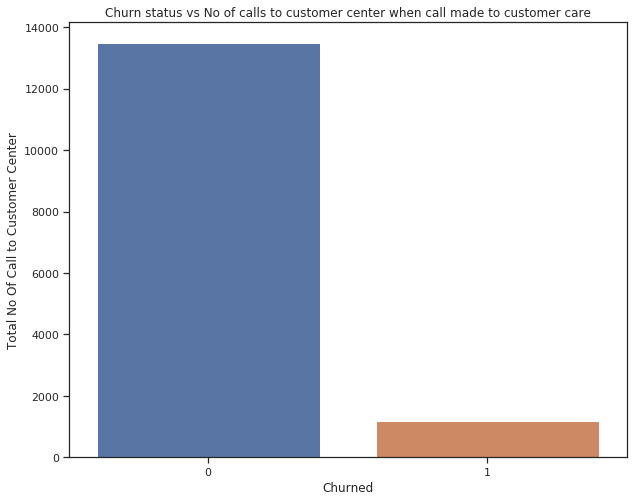

In [34]:
# 3. What is the probability of the customer connecting to customer care center and then leaving the network ?

def calledCustomerCenter(minutes):
    if minutes > 0 :
        return 1
    else:
        return 0

churn['total_t2c'] = churn.loc_og_t2c_mou_6 + churn.loc_og_t2c_mou_7 + churn.loc_og_t2c_mou_8
churn['call_to_customer_center'] = churn.total_t2c.apply(calledCustomerCenter)


print('Count of churned and non churned customers when calls made to customer center...')
plot3 = churn.loc[churn.call_to_customer_center == 1].groupby([churn.churned]).churned.count().reset_index(name = "call_to_customer_center")
print(plot3)

print('Count of churned and non churned customers when call not made to customer center...')
plot3_1 = churn.loc[churn.call_to_customer_center == 0].groupby([churn.churned]).churned.count().reset_index(name = "call_to_customer_center")
print(plot3_1)


plt.figure(figsize=(10, 8))
axes = sns.barplot(x='churned',y='call_to_customer_center', orient ="v"  , data=plot3)
plt.xlabel('Churned')
plt.ylabel('Total No Of Call to Customer Center')
plt.title('Churn status vs No of calls to customer center when call made to customer care')
plt.show()

Inference : Only few people who made calls to customer care  , left the network . There doesn't seem  to be any pattern or direct impact of customer calling customer center and customers leaving the network.

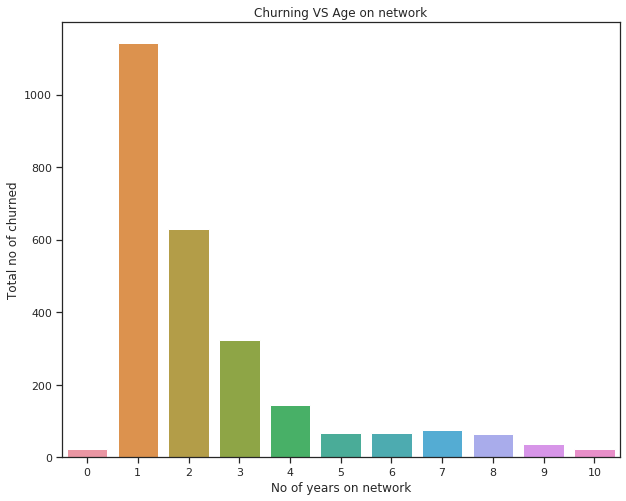

In [35]:
# 4. Influence of Customer age on network to churning.

def calculateYears(aon):
    return round(aon/365)

churn['aon_years'] = churn.aon.apply(calculateYears)

churn.aon_years.unique()

plot_4 = churn[churn.churned == 1].groupby(['aon_years']).mobile_number.count().reset_index()

plt.figure(figsize=(10, 8))
axes = sns.barplot(x='aon_years',y='mobile_number', orient ="v"  , data=plot_4)
plt.xlabel('No of years on network')
plt.ylabel('Total no of churned')
plt.title('Churning VS Age on network')
plt.show()

<b>Inference :</b> It is visible that customers who are on network from 1 year to 3 years are most likely to churn

## Multivariate Analysis

Let's analyze the data and try to find the answers for the below questions
1. Is there any pattern in the usage of calls, data , packs services of the customer who left the network ?

In [36]:
# 1. Is there any pattern in the usage of calls, data , packs services of the customer who left the network ?
# Determines if the customers usage of calls and data is reduced in the action phase based on revenue.

def calculateUsage(rows):
    if((rows.arpu_8 + rows.arpu_2g_8 + rows.arpu_3g_8) - (rows.good_phase_avg_revenue_call + rows.good_phase_avg_revenue_2g + rows.good_phase_avg_revenue_3g)>=0):
        #Usage not reduced
        return 0
    else:
        #Usage reduced
        return 1
    
churn['good_phase_avg_revenue_call'] = (churn.arpu_6 + churn.arpu_7)/2
churn['good_phase_avg_revenue_2g'] = (churn.arpu_2g_6 + churn.arpu_2g_7)/2
churn['good_phase_avg_revenue_3g'] = (churn.arpu_3g_6 + churn.arpu_3g_7)/2

churn['usage_reduced'] = churn.apply(calculateUsage,axis=1)

plot4 = churn.groupby([churn.churned,churn.usage_reduced,churn.aon_years]).mobile_number.count().reset_index()
print(plot4)


    churned  usage_reduced  aon_years  mobile_number
0         0              0          0             23
1         0              0          1           3368
2         0              0          2           2028
3         0              0          3           1505
4         0              0          4            994
5         0              0          5            677
6         0              0          6            686
7         0              0          7            860
8         0              0          8            691
9         0              0          9            465
10        0              0         10            368
11        0              0         11              8
12        0              1          0             44
13        0              1          1           4846
14        0              1          2           2894
15        0              1          3           2013
16        0              1          4           1276
17        0              1          5         

<b>Inference : </b>It can be seen from the record no 36 , 37 , 38 , 39  that around 1.5k customers have been churned and there usage in action phase has been reduced.



## Feature Engineering

So far we have created 10 features :- 

1. avg_rech_good_phase
    - Average recharge done in good phase i.e mothn 6 & 7.
2. avg_revenue_total
    - Total of Average revenue from calling service opted by the customer in all 3 months.
3. avg_2g_revenue_total
    - Total of Average revenue from 2g service in all 3 months.
4. avg_3g_revenue_total
    - Total of Average revenue from 3g service in all 3 months    .
5. avg_data_revenue_total
    - Total of average revenue from 2g and 3g service.
6. good_phase_avg_revenue_call
    - Total of average revenue from calling service in month of 6 & 7.
7. good_phase_avg_revenue_2g
    - Total of average revenue from 2g service in month of 6 & 7.
8. good_phase_avg_revenue_3g
    - Total of average revenue from 3g service in month of 6 & 7.
9. usage_reduced
    - Determines if the usage of calling or data service has been reduced in action phase i.e month 8.
    
Creating few more featue columns :-
1. No of days since last recharge
    - No of days elapsed since last recharge
2. Total mou usage
    - Total montly usage of incoming and outgoing calls
   



#### 1. Using last date of rech field to create  No of days since last recharge column

In [0]:
#Converting below dates to datetime datatype
categorical_data['date_of_last_rech_6'] = pd.to_datetime(categorical_data['date_of_last_rech_6'])
categorical_data['date_of_last_rech_7'] = pd.to_datetime(categorical_data['date_of_last_rech_7'])
categorical_data['date_of_last_rech_8'] = pd.to_datetime(categorical_data['date_of_last_rech_8'])

#Creating no.of days since last recharge day
categorical_data['no_of_days_last_rech_6'] = (pd.to_datetime('2014-08-31') - pd.to_datetime(categorical_data['date_of_last_rech_6'])).dt.days
categorical_data['no_of_days_last_rech_7'] = (pd.to_datetime('2014-08-31') - pd.to_datetime(categorical_data['date_of_last_rech_7'])).dt.days
categorical_data['no_of_days_last_rech_8'] = (pd.to_datetime('2014-08-31') - pd.to_datetime(categorical_data['date_of_last_rech_8'])).dt.days


In [0]:
#Dropping Date fields as we have created features on it
categorical_data.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1, inplace=True)

In [39]:
#Checking new feature
categorical_data[['no_of_days_last_rech_6','no_of_days_last_rech_7','no_of_days_last_rech_8']].head()

,no_of_days_last_rech_6,no_of_days_last_rech_7,no_of_days_last_rech_8
7,65,37,5
8,67,31,1
13,72,40,1
16,62,31,17
17,62,32,6


#### 2. Using incoming mou & outgoing mou columns to create Total mou usage column

In [40]:
#All Cols from June
june_cols = [col for col in numeric_data.columns if col.endswith('_6')]
numeric_data[june_cols].head()

,arpu_6,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,last_day_rch_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_3g_6,arpu_2g_6,sachet_2g_6,sachet_3g_6
7,1069.180,57.84,453.43,16.23,23.74,51.39,308.63,0.38,0.0,422.16,4.30,49.89,6.66,60.86,0.0,4.50,0.00,487.53,58.14,217.56,2.06,427.88,1.13,7.33,52.19,15.39,626.46,0.21,2.06,15.74,5.0,584.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
8,378.721,413.69,94.66,0.00,0.00,33.33,80.96,0.00,0.0,378.09,116.56,13.69,0.00,130.26,0.0,0.00,0.00,508.36,23.84,57.58,0.00,81.43,0.00,22.43,0.00,22.43,103.86,0.00,0.00,0.00,19.0,437.0,90.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
13,492.846,501.76,413.31,23.53,7.98,49.63,151.13,4.54,0.0,205.31,13.63,255.36,0.00,701.78,0.0,0.00,0.00,907.09,67.88,142.88,4.81,215.58,1.13,7.33,0.00,15.39,205.24,0.45,245.28,83.48,6.0,507.0,110.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
16,430.975,50.51,296.29,0.00,0.00,42.61,273.29,0.00,0.0,315.91,7.89,22.99,0.00,30.89,0.0,0.00,0.00,346.81,41.33,226.81,8.71,276.86,1.13,18.68,0.51,87.99,364.86,0.00,0.00,0.00,10.0,570.0,110.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0
17,690.008,128.33,61.64,0.00,0.00,38.99,58.54,0.00,0.0,97.54,13.63,1.55,0.00,1148.46,0.0,2.58,0.93,1249.53,34.54,47.41,0.00,81.96,8.63,1.28,0.00,9.91,91.88,0.00,0.00,0.00,19.0,816.0,110.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0


In [0]:
#Creating total usage feature
numeric_data['total_mou_6'] = numeric_data.total_og_mou_6 + numeric_data.total_ic_mou_6
numeric_data['total_mou_7'] = numeric_data.total_og_mou_7 + numeric_data.total_ic_mou_7
numeric_data['total_mou_8'] = numeric_data.total_og_mou_8 + numeric_data.total_ic_mou_8


### Combining Numeric columns and Categorical Column into final dataset

In [42]:
#Merging Categorical and Numerical dataframe

final_df = pd.concat([numeric_data,categorical_data], axis=1)

churn_feature = churn[['avg_revenue_total', 'avg_2g_revenue_total', 'avg_3g_revenue_total', 'avg_data_revenue_total', 'total_og_mou', 'total_ic_mou',
 'total_t2c', 'call_to_customer_center', 'aon_years', 'good_phase_avg_revenue_call', 'good_phase_avg_revenue_2g',
 'good_phase_avg_revenue_3g', 'usage_reduced']]

final_df = pd.concat([final_df,churn_feature], axis=1)
churn_feature.head()


,avg_revenue_total,avg_2g_revenue_total,avg_3g_revenue_total,avg_data_revenue_total,total_og_mou,total_ic_mou,total_t2c,call_to_customer_center,aon_years,good_phase_avg_revenue_call,good_phase_avg_revenue_2g,good_phase_avg_revenue_3g,usage_reduced
7,2014.832,0.0,0.00,0.00,1446.93,1613.24,0.00,0,2,781.3705,0.0,0.0,1
8,1008.306,0.0,19.83,19.83,1111.58,148.89,7.15,1,1,435.4720,0.0,0.0,1
13,1291.777,0.2,0.00,0.20,2114.76,571.26,0.49,1,7,349.2585,0.0,0.0,0
16,918.738,0.0,0.00,0.00,866.20,1040.88,0.00,0,1,365.4220,0.0,0.0,1
17,734.487,0.0,0.00,0.00,1250.34,94.19,0.00,0,2,354.4940,0.0,0.0,1


In [43]:
# Lets take a look at final dataset
final_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_good_phase,total_mou_6,total_mou_7,total_mou_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,churned,no_of_days_last_rech_6,no_of_days_last_rech_7,no_of_days_last_rech_8,avg_revenue_total,avg_2g_revenue_total,avg_3g_revenue_total,avg_data_revenue_total,total_og_mou,total_ic_mou,total_t2c,call_to_customer_center,aon_years,good_phase_avg_revenue_call,good_phase_avg_revenue_2g,good_phase_avg_revenue_3g,usage_reduced
7,1069.180,493.561,452.091,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,0.38,0.45,0.31,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.0,0.0,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,2.06,2.33,2.13,427.88,355.23,188.04,1.13,11.83,0.78,7.33,7.74,6.38,52.19,34.24,22.21,15.39,16.48,13.61,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,584.0,790.0,520.0,120.0,128.0,130.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,1185.0,1113.99,1167.28,778.90,0,0,0,0,0,0,1,65,37,5,2014.832,0.0,0.00,0.00,1446.93,1613.24,0.00,0,2,781.3705,0.0,0.0,1
8,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,33.33,33.87,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,2.0,0.0,0.0,154.0,23.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0

In [44]:
#Check the dimensions of the final dataset
final_df.shape

(30011, 167)

## Modelling

### Handling Imbalanced data using Smote method
To know more about Synthetic Minority Over-sampling Technique visit the below links : -
   - https://towardsdatascience.com/a-deep-dive-into-imbalanced-data-over-sampling-f1167ed74b5
   - http://rikunert.com/SMOTE_explained
   
   Installed library using <b>conda install -c conda-forge imbalanced-learn </b> command and <b>conda install -c conda-forge xgboost
</b>

Steps to follow while modelling : - 
    1. Split into train and test.
    2. Scale the data using standard scaler.
    3. Creating Models
    
        1. Model 1 - RandomForestClassifier
            - apply smote - oversampling to balance data
            - use PCA to remove collinearity and find the no of components that explain approx 95% varaince.  
            - create RandomForestClassifier.
            - check the Accuracy , recall & AUC.
            
            - apply smote - undersampling to balance data
            - use PCA to remove collinearity and find the no of components that explain approx 95% varaince.  
            - create RandomForestClassifier.
            - check the Accuracy , recall & AUC.
            
            based on the best Accurancy , recall & AUC select smote 
            technique . i.e oversampling / undersampling
            
            - Create RandomForestClassifier model using GridSearchCV  to find best hyper parameters
            - hypertune the parameters and check the Accurancy , recall & AUC parameters.
            
        2. Model 2 - Logistic Regression
            - apply smote - oversampling to balance data
            - use PCA to remove collinearity and find the no of components that explain approx 95% varaince.  
            - Create Logistic Regression
            - check the Accuracy , recall & AUC.
            
        3. Model 3 - XGBoost  USING RFECV 
            - apply smote - oversampling to balance data
            - Create XGBoost using RFECV to find optimum no of important columns.
            - Find the important features.
            - Create XGBoost using the important columns suggested.
            - check the Accuracy , recall & AUC.
        
        4. Model 4 - Random Forest USING RFECV
            - apply smote - oversampling to balance data
            - Create RandomForestClassifier using RFECV to find optimum no of important columns.
            - Find the important features.           
            - check the Accuracy , recall & AUC.

In [0]:
from imblearn.over_sampling import SMOTE

#### Split into train & test 

In [0]:
#Split train and test

X = final_df.drop('churned',1)
y = final_df['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
#Checking data distribution
print(y_train.value_counts())
print(y_test.value_counts())

0    19187
1     1820
Name: churned, dtype: int64
0    8231
1     773
Name: churned, dtype: int64


#### Scaling of data

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Aplying Smote - Oversampling

In [0]:
smt =SMOTE()
X_train_o,y_train_o = smt.fit_sample(X_train,y_train)

In [50]:
#Checking distribution after Smote
np.bincount(y_train_o)

array([19187, 19187])

Observation: Both categories have equal amount of records. More specifically, the minority class has been increased to the total number of majority class.

#### Applying PCA

In [0]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_o = pca.fit_transform(X_train_o)
X_test = pca.transform(X_test)

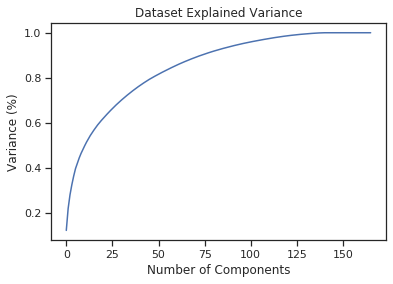

In [52]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

This plot tells us that selecting 140 components we can preserve something around 95% to 98% of the total variance of the data.

In [0]:
pca = PCA(n_components=140)
X_train_o = pca.fit_transform(X_train_o)
X_test = pca.transform(X_test)

### Model 1 

#### Training and Prediction using RandomForestClassifier

In [0]:
classifier = RandomForestClassifier(max_depth=2, random_state=42)
classifier.fit(X_train_o, y_train_o)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Predict probabilities for the test data
probs  = classifier.predict_proba(X_test)


ROC Curve - Function definition

In [0]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange',  label='ROC curve (area = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

#### Checking Accuracy

In [56]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

[[6466 1765]
 [ 294  479]]
Accuracy: 0.7713238560639716
Recall: 0.6196636481241915
AUC: 0.75


#### Plot ROC

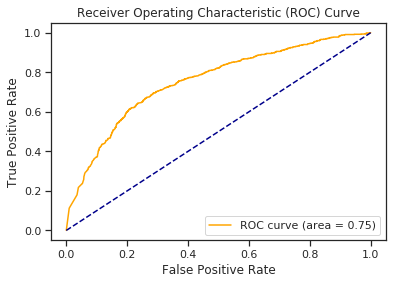

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

For base model with 140 PCA components and using random forest we are able to achieve ROC AUC 0.75

#### Aplying Smote - Undersampling

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train_u, y_train_u = nr.fit_sample(X_train, y_train)

In [60]:
np.bincount(y_train_u)

array([1820, 1820])

#### Applying PCA on under sampled data

In [0]:
#import library
from sklearn.decomposition import PCA

pca = PCA()
X_train_u = pca.fit_transform(X_train_u)
#X_test = pca.transform(X_test)


In [62]:
print(X_train_u.shape)
print(X_test.shape)

(3640, 166)
(9004, 166)


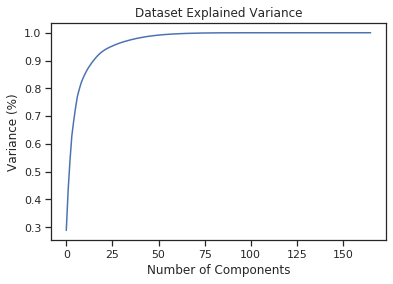

In [63]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [0]:
#Taking only 50 components as it give accuracy between 95 t0 98
pca = PCA(n_components=50)
X_train_u = pca.fit_transform(X_train_u)
X_test = pca.transform(X_test)

#### Training and Prediction using undersampled data

In [0]:
classifier = RandomForestClassifier(max_depth=2, random_state=42)
classifier.fit(X_train_u, y_train_u)

# Predicting the Test set results
#y_pred = classifier.predict(X_test)

# Predict probabilities for the test data
probs  = classifier.predict_proba(X_test)

#### Checking accuracy after using undersampled data

[[6466 1765]
 [ 294  479]]
Accuracy: 0.7713238560639716
Recall: 0.6196636481241915
AUC: 0.42


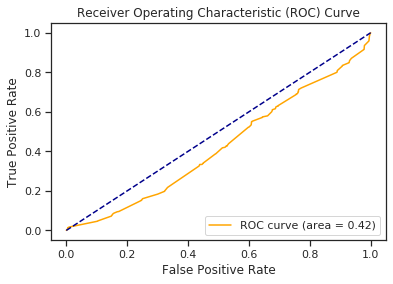

In [66]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

For base model with PCA components and using random forest we are able to achieve ROC AUC 0.42

Inference:
As per comparison of ROC between over sampling and undersampling, we are receiving better ROC for oversampled data. Hence we are going to do further improvement on oversampled data.

#### Random Forest - Hyperparameter Tuning on Oversampled data

In [67]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

from sklearn.utils import parallel_backend
with parallel_backend('threading'):
    bestF = grid_search.fit(X_train_o, y_train_o)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 22.6min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 27.5min finished


#### Best Hyperparameter

In [68]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8499244279981237 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [0]:
#Final Execution
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#SMOTE
X_train_o,y_train_o = smt.fit_sample(X_train,y_train)

#PCA with selected components
pca = PCA(n_components=140)
X_train_o = pca.fit_transform(X_train_o)
X_test = pca.transform(X_test)

#### Fitting the final model with the best parameters obtained from grid search.

In [70]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=300)
rfc.fit(X_train_o, y_train_o)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Prediction on Training
y_pred = rfc.predict(X_train_o)
probs = rfc.predict_proba(X_train_o)

[[17544  1643]
 [ 2807 16380]]
Accuracy: 0.8840360660864127
Recall: 0.8537030280919372
AUC: 0.96


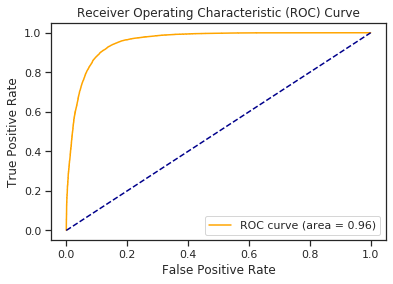

In [72]:
#Checking Accuracy metrics
cm = confusion_matrix(y_train_o, y_pred)
print(cm)
print("Accuracy:",accuracy_score(y_train_o, y_pred))
print("Recall:",recall_score(y_train_o, y_pred))

probs = probs[:, 1]
auc = roc_auc_score(y_train_o, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_train_o, probs)
plot_roc_curve(fpr, tpr)

ROC AUC curve is 0.96% on Training data

In [0]:
#Prediction on Test
y_pred = rfc.predict(X_test)
probs = rfc.predict_proba(X_test)

[[7443  788]
 [ 267  506]]
Accuracy: 0.8828298533984895
Recall: 0.6545924967658473
AUC: 0.88


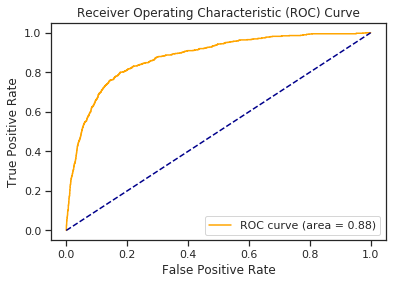

In [74]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)

ROC AUC curve is 0.88% on Test data. Two points to be notice here.

1. After parameter tuning ROC increased to 0.88% from 0.75%
2. Model is slighly overfitting because ROC on taining data is 0.96% and on test data is 0.88%

### Model 2  
#### Training and Prediction using Logistic Regression

In [0]:
import statsmodels.api as sm

In [76]:
print(X.shape)
print(y.shape)
#Splitting
log_X_train, log_X_test, log_y_train, log_y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#SMOTE
log_X_train_o,log_y_train_o = smt.fit_sample(log_X_train,log_y_train)

#PCA with selected components
pca = PCA(n_components=140)
log_X_train_o = pca.fit_transform(log_X_train_o)
log_X_test = pca.transform(log_X_test)

(30011, 166)
(30011,)


In [0]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(log_X_train_o,log_y_train_o)

In [0]:
#Making prediction on the Train data
y_pred = model_pca.predict(log_X_train_o)
probs = model_pca.predict_proba(log_X_train_o)

[[16215  2972]
 [ 2601 16586]]
Accuracy: 0.8547714598426017
Recall: 0.8644394642205661
AUC: 0.92


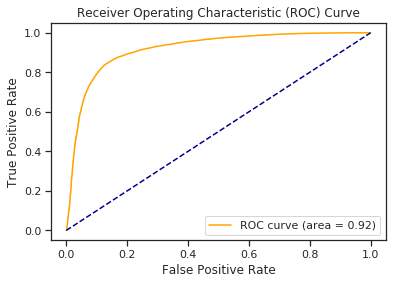

In [79]:
cm = confusion_matrix(log_y_train_o, y_pred)
print(cm)
print("Accuracy:",accuracy_score(log_y_train_o, y_pred))
print("Recall:",recall_score(log_y_train_o, y_pred))

probs = probs[:, 1]
auc = roc_auc_score(log_y_train_o, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(log_y_train_o, probs)
plot_roc_curve(fpr, tpr)

ROC AUC is 0.92% on Train data. 

In [0]:
#Making prediction on the test data
y_pred = model_pca.predict(log_X_test)
probs = model_pca.predict_proba(log_X_test)
 
#"{:2.2}".format(metrics.roc_auc_score(log_y_test, pred_probs_test))

[[6906 1325]
 [ 139  634]]
Accuracy: 0.8374055975122168
Recall: 0.8201811125485123
AUC: 0.89


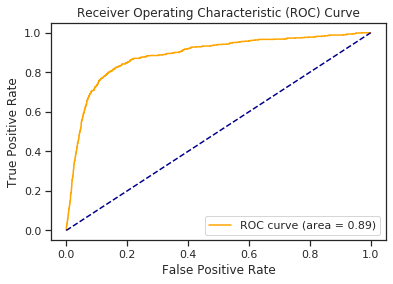

In [81]:
cm = confusion_matrix(log_y_test, y_pred)
print(cm)
print("Accuracy:",accuracy_score(log_y_test, y_pred))
print("Recall:",recall_score(log_y_test, y_pred))

probs = probs[:, 1]
auc = roc_auc_score(log_y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(log_y_test, probs)
plot_roc_curve(fpr, tpr)

ROC AUC is 0.89 on Test data. 
Model is not overfitting because ROC on taining data is 0.92% and on test data is 0.89%

Model Selection:
1.   Random Forest's ROC AUC:0.87%
2.   Logistic Regression's ROC AUC: 0.89%

Here logistic regression provides us better ROC AUC than Random Forest.Hence we are selecting final model as Logistic regression.  

In [0]:
## Finding Important Variables

### Using XGBoost and RFECV to find important varaibles

In [0]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

#Splitting the data in train and test.
xg_X_train, xg_X_test, xg_y_train, xg_y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Getting the column name as data will be converted into mp.array
cols = xg_X_train.columns
xg_X_test = xg_X_test[cols].as_matrix()

#Scaling the data using standard scaler for SMOTE
sc = StandardScaler()
xg_X_train = sc.fit_transform(xg_X_train)
xg_X_test = sc.transform(xg_X_test)

#SMOTE - upscaling the data to balance the event rates
xg_X_train_o,xg_y_train_o = smt.fit_sample(xg_X_train,xg_y_train)


In [0]:
#Creating XGBoost model
xgb_model = XGBClassifier()

#Creating RFECV model using XGBoost
selector = RFECV(xgb_model, step=1, min_features_to_select=1, cv=StratifiedKFold(4), scoring='roc_auc')

#fitting the model, to get the rank of the variables, and a matrix of the selected X variables
selector = selector.fit(xg_X_train_o, xg_y_train_o)

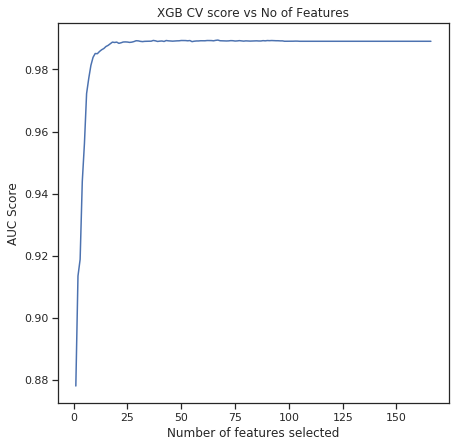

In [85]:
#PLot # of features selected vs. Model Score
plt.figure(figsize=(7,7))
plt.title('XGB CV score vs No of Features')
plt.xlabel("Number of features selected")
plt.ylabel("AUC Score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [86]:
#ranking of each column as suggested by RFECV
selector.ranking_ 

array([  1,   3,   1,  37,   2,   1,  20,  11,   5,   1,   1,   1,  46,
         1,   1,   1,  19,   1,  15,  45,   1,  18,  25,   1,  22,   1,
        81,  83,   1,   1,  27,  32,   1,   1,  67,  69,  33,  59,  61,
        89,  63,  56,  85,  87,  88,   1,   1,   1,   1,  71,  73,   1,
         4,   1,  92,  94,  96,  98,  14,  42,  44,  79,   1,  16,  29,
         1,   1,   1,  51,  84,   1,  21,  39,   6,  57,  58,  23,   1,
         1,  54,   1,   1, 100,  99,   1,   1,   1,   1,  30,  28,   1,
         1,   1,  52,  26,   1,   1,   1,   1,   1,   1,   1,  86,   1,
         1,   7,   1,   1,   1,   1,  10,  17,  90,   1,  36,  55,   1,
         8,  62,   1,  47,   1,  38,  49,  70,  66,  76,  60,  40,  43,
        24,  91,  93,  95,  97,   1,  72,  74,  77,  78,  34,   1,   9,
         1,  65,  13,  75,  35,  41,  50,   1,   1,   1,  12,   1,  64,
        53,  48,  31,   1,   1,   1,  68,  80,  82,   1])

In [87]:
#Importance of each column as per RFECV
selector.estimator_.feature_importances_ 

array([0.00229778, 0.01002038, 0.00498017, 0.00223296, 0.00589614,
       0.01407973, 0.00171547, 0.06102564, 0.00472182, 0.00293344,
       0.00260849, 0.00961919, 0.00502506, 0.00399105, 0.00407876,
       0.00776363, 0.01502231, 0.01280349, 0.01156256, 0.00787554,
       0.0021506 , 0.00633811, 0.02780552, 0.00319651, 0.01311448,
       0.00478027, 0.01262807, 0.00308015, 0.00395324, 0.00905234,
       0.11893255, 0.00458476, 0.00995167, 0.00400171, 0.00285674,
       0.00672323, 0.0019584 , 0.0136124 , 0.00700982, 0.07031333,
       0.00445755, 0.00301756, 0.09825245, 0.00982014, 0.00776774,
       0.02912668, 0.00634718, 0.018905  , 0.00539769, 0.02809031,
       0.0179136 , 0.00561995, 0.01828562, 0.01705646, 0.00341691,
       0.00500345, 0.00300768, 0.00470505, 0.04175021, 0.01326201,
       0.00841191, 0.01832957, 0.00459777, 0.03949029, 0.01340147,
       0.01678575, 0.04148239], dtype=float32)

In [0]:
#Creating the list of column and its importance value
importances = list(zip(selector.estimator_.feature_importances_, cols))
importances.sort(reverse=True)

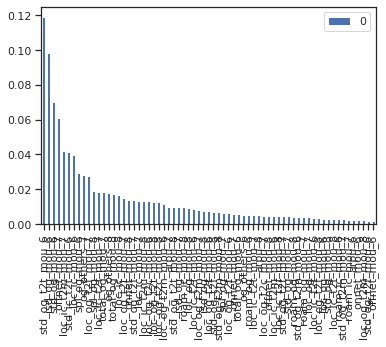

In [89]:
#plotting the importance of column
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')


In [90]:
#selecting top 25 columns as per RFECV
cols_to_select = [ importances[i][1] for i in range(0,30)] 
cols_to_select

['std_og_t2t_mou_6',
 'isd_og_mou_6',
 'std_og_mou_6',
 'offnet_mou_7',
 'loc_ic_t2m_mou_7',
 'std_ic_t2t_mou_6',
 'loc_ic_mou_6',
 'spl_og_mou_6',
 'og_others_7',
 'loc_og_t2f_mou_7',
 'spl_og_mou_8',
 'loc_ic_t2f_mou_7',
 'total_og_mou_7',
 'og_others_8',
 'total_og_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2t_mou_7',
 'onnet_mou_8',
 'std_og_t2f_mou_7',
 'loc_ic_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2t_mou_8',
 'loc_og_t2c_mou_8',
 'loc_og_t2m_mou_6',
 'arpu_7',
 'std_og_t2t_mou_8',
 'isd_og_mou_7',
 'roam_ic_mou_8',
 'loc_og_mou_8']

In [91]:
#Keeping the columns as suggested by RFECV and droping rest of it.
x = X.drop([x for x in X.columns if x not in cols_to_select] , axis=1)
x.columns

Index(['arpu_7', 'onnet_mou_8', 'offnet_mou_7', 'roam_ic_mou_8',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_8',
       'std_og_t2f_mou_7', 'std_og_mou_6', 'isd_og_mou_6', 'isd_og_mou_7',
       'spl_og_mou_6', 'spl_og_mou_8', 'og_others_7', 'og_others_8',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6'],
      dtype='object')

In [0]:
# Creating XGBoost model with 25 columns as suggested by RFECV
xg_X_train, xg_X_test, xg_y_train, xg_y_test = train_test_split(x, y, test_size=0.3, random_state=42)

cols = xg_X_train.columns
xg_X_test = xg_X_test[cols].as_matrix()

#scaling the data
sc = StandardScaler()
xg_X_train = sc.fit_transform(xg_X_train)
xg_X_test = sc.transform(xg_X_test)

#using SMOTE to balance data
xg_X_train_o,xg_y_train_o = smt.fit_sample(xg_X_train,xg_y_train)


# fit model on all training data
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)


In [0]:

#Fit the model on the data
xgb_model.fit(xg_X_train_o, xg_y_train_o)


#Prediction on Training
y_pred = xgb_model.predict(xg_X_train_o)
probs = xgb_model.predict_proba(xg_X_train_o)


[[17847  1340]
 [ 1224 17963]]
Accuracy: 0.9331839266169802
Recall: 0.936206806692031
AUC: 0.98


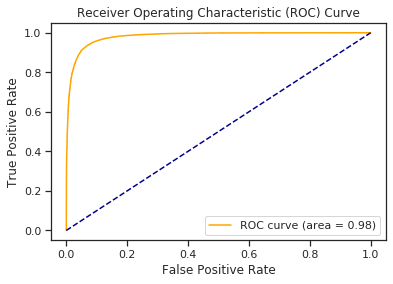

In [94]:
#Checking Accuracy metrics
cm = confusion_matrix(xg_y_train_o, y_pred)
print(cm)
print("Accuracy:",accuracy_score(xg_y_train_o, y_pred))
print("Recall:",recall_score(xg_y_train_o, y_pred))

probs = probs[:, 1]
auc = roc_auc_score(xg_y_train_o, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(xg_y_train_o, probs)
plot_roc_curve(fpr, tpr)

In [0]:
#Prediction on Test
y_pred = xgb_model.predict(xg_X_test)
probs = xgb_model.predict_proba(xg_X_test)

[[7598  633]
 [ 255  518]]
Accuracy: 0.9013771657041315
Recall: 0.6701164294954722
AUC: 0.89


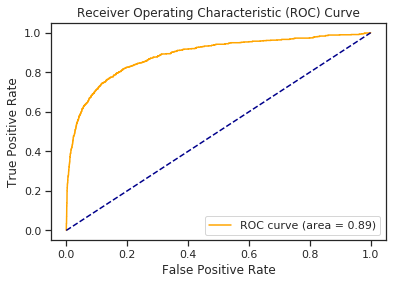

In [96]:

cm = confusion_matrix(xg_y_test, y_pred)
print(cm)
print("Accuracy:",accuracy_score(xg_y_test, y_pred))
print("Recall:",recall_score(xg_y_test, y_pred))

probs = probs[:, 1]
auc = roc_auc_score(xg_y_test, probs)
print('AUC: %.2f' % auc)

fpr, tpr, thresholds = roc_curve(xg_y_test, probs)
plot_roc_curve(fpr, tpr)

It can be seen here that the model is trying to overfit and there is huge difference in the AUC for train and test data , 0.98 on training and 0.88 on test.

### Model  - Random Forest to identify churn idicators

In [97]:
#Final Execution
#Splitting
X = final_df.drop('churned',1)
y = final_df['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Shape of train:",X_train.shape)
print("Shape of test:",X_test.shape)


Shape of train: (21007, 166)
Shape of test: (9004, 166)


#### RFE

In [98]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
rfc = RandomForestClassifier(random_state=42)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(3), scoring='roc_auc')
rfecv.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                       criterion='gini', max_depth=None,
                                       max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators='warn', n_jobs=None,
                                       oob_score=False, random_state=42,
                                       verbose=0, warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='roc_auc', step=1,
      verbose=0)

In [99]:
#Optimal Features
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 50


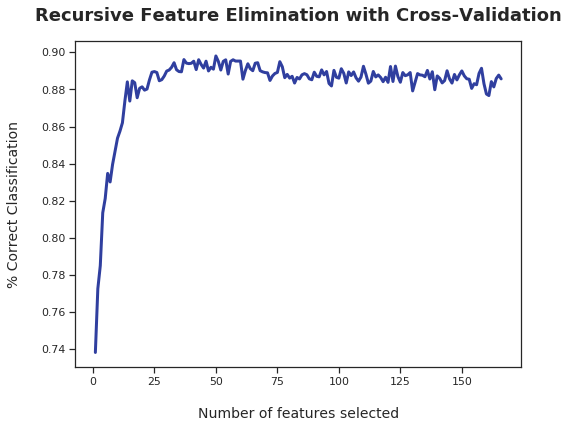

In [100]:
plt.figure(figsize=(8, 6))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [0]:
cols_drop = list(X_train.columns[np.where(rfecv.support_ == False)[0]])

In [0]:
#Selecting RFE features
rfe_cols = [cols for cols in X_train.columns if (cols not in cols_drop )]

In [103]:
 X_train_rfe = X_train[rfe_cols]
 X_test_rfe = X_test[rfe_cols]
 print("Train Data:",X_train_rfe.shape)
 print("Test Data",X_test_rfe.shape)

Train Data: (21007, 50)
Test Data (9004, 50)


#### Balancing data with SMOTE

In [0]:
#SMOTE
smt =SMOTE()
X_train_o,y_train_o = smt.fit_sample(X_train_rfe,y_train)

In [105]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

from sklearn.utils import parallel_backend
with parallel_backend('threading'):
    bestF = grid_search.fit(X_train_o, y_train_o)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 20.3min finished


In [106]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.905821650075572 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [107]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)
rfc.fit(X_train_o, y_train_o)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Prediction on Training
y_pred = rfc.predict(X_train_o)
probs = rfc.predict_proba(X_train_o)

In [109]:
#Checking Accuracy metrics
cm = confusion_matrix(y_train_o, y_pred)
print(cm)
print("Accuracy:",accuracy_score(y_train_o, y_pred))
print("Recall:",recall_score(y_train_o, y_pred))

probs = probs[:, 1]
auc = roc_auc_score(y_train_o, probs)
print('AUC: %.2f' % auc)

#fpr, tpr, thresholds = roc_curve(y_train_o, probs)
#plot_roc_curve(fpr, tpr)

[[17509  1678]
 [ 1541 17646]]
Accuracy: 0.9161150779173398
Recall: 0.9196852035232188
AUC: 0.97


In [0]:
#Prediction on Training
y_pred = rfc.predict(X_test_rfe)
probs = rfc.predict_proba(X_test_rfe)

In [111]:
#Checking Accuracy metrics
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy:",accuracy_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))

probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

#fpr, tpr, thresholds = roc_curve(y_train_o, probs)
#plot_roc_curve(fpr, tpr)

[[7514  717]
 [ 173  600]]
Accuracy: 0.9011550422034651
Recall: 0.7761966364812419
AUC: 0.93


ROC AUC is 0.93 on Test data. Model is not overfitting because ROC on taining data is 0.97 and on test data is 0.93

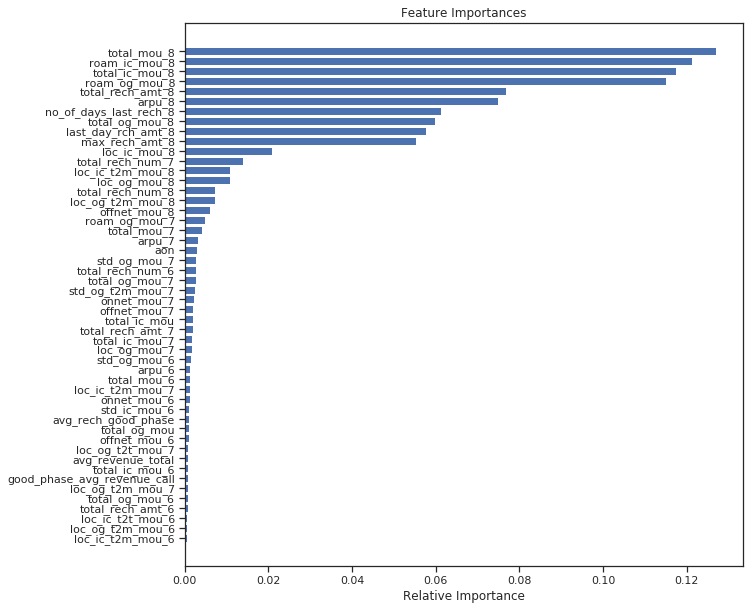

In [113]:
features = X_train_rfe.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(10, 10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Top indicators of customer churn:
* We have selected top 10 churn indicators based on there relative importance. All the top 10 indicators belongs month 8(August) i.e. action phase.
* Few churn indicators are from our feature engineering exercise
    1. total_ic_mou_8(Total Incoming monthly usage) -
    2. roam_og_mou_8(Roaming Outgoing monthly usage)
    3. total_mou_8(Total monthly usage)
    4. roam_ic_mou_8(Roaming Incoming monthly usage)
    5. arpu_8(Average Revenue per User)
    6. total_rech_amt_8(Total recharge amount)
    7. last_day_rech_amt_8(Last recharge amount)
    8. no_of_days_last_rech_8(No of days since last recharge)
    9. total_og_mou_8(Total outgoing monthly usage)
    10. max_rech_amt_8(Max recharge amount)
    
### Suugestion based on EDA and Top Indicator to improve the business and reduce churn

    1. The operator should improve the incoming and outgoing calling service as most of the customer are using call service only.
    2.The operator should provide some offers to the customers if the usage of services is reduced in 8th month.
    3. Operator should improve and create affordable data services as many customers are not opting for it